
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [ ]:
student_number = '99102189'
first_name = 'Mohammad'
last_name = 'Mohammad Beigi'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [ ]:
spotify_data = pd.read_csv('/content/spotify.csv')

# Selecting relevant columns
relevant_columns = [
    'track_name', 'track_popularity',
    'danceability', 'energy', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo'
]

filtered_data = spotify_data[relevant_columns]

In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

In [ ]:
# Load the dataset
spotify_data = pd.read_csv('/content/spotify.csv')

# Selecting relevant columns
relevant_columns = [
    'track_name', 'track_popularity',
    'danceability', 'energy', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo'
]

filtered_data = spotify_data[relevant_columns]

def standard_scaler(data):
    """
    Standardizes the data such that each feature has a mean of 0 and a standard deviation of 1.

    Parameters:
    data (DataFrame): The dataframe containing the data to be standardized.

    Returns:
    DataFrame: The standardized data.
    """
    mean = data.mean()
    std = data.std()

    scaled_data = (data - mean) / std
    return scaled_data

# Applying the standard scaler to the relevant columns
numeric_columns = [
    'track_popularity', 'danceability', 'energy', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

# Extracting only the numeric data for scaling
numeric_data = filtered_data[numeric_columns]

# Standardizing the data
standardized_data = standard_scaler(numeric_data)

# Display the standardized data
print(standardized_data.head())

# Display descriptive statistics
print(standardized_data.describe())


   track_popularity  danceability    energy  speechiness  acousticness  \
0          0.941517      0.642039  1.201596    -0.481355     -0.333893   
1          0.981542      0.490404  0.643307    -0.688631     -0.468663   
2          1.101619      0.138887  1.284510    -0.324417     -0.436792   
3          0.701364      0.435264  1.278982    -0.050023     -0.667632   
4          1.061593     -0.033425  0.742804    -0.702450     -0.432694   

   instrumentalness  liveness   valence     tempo  
0         -0.377947 -0.809217  0.031907  0.042926  
1         -0.359172  1.081044  0.782510 -0.777186  
2         -0.377843 -0.519554  0.439377  0.116225  
3         -0.377905  0.089580 -1.001780  0.039953  
4         -0.377947 -0.692574  0.919763  0.115035  
       track_popularity  danceability        energy   speechiness  \
count      3.283300e+04  3.283300e+04  3.283300e+04  3.283300e+04   
mean      -1.512714e-16  1.348241e-16  3.893237e-16 -1.185933e-16   
std        1.000000e+00  1.000000e+0

### Importance of Using a Standard Scaler

1. **Feature Scaling**: Standard Scalers normalize the range of features so that each feature contributes equally to the analysis. Without scaling, features with larger magnitudes will dominate the distance calculations, skewing the results.

2. **Distance-Based Algorithms**: Many clustering algorithms (e.g., K-Means, DBSCAN) rely on distance measures (e.g., Euclidean distance). If features are not standardized, features with larger scales will disproportionately influence these distance measures.

3. **Improved Convergence**: For algorithms like K-Means, which use iterative refinement, scaling helps the algorithm converge faster. The initial random assignment of centroids can be more meaningful if the data is scaled, leading to quicker and more accurate convergence.

4. **Avoiding Numerical Instability**: Unscaled data can cause numerical instability in computations, especially in algorithms that involve matrix inversions or decomposition. This instability can result in poor clustering performance or failure to converge.

### Potential Complications Without Standard Scaling

1. **Dominance of Larger Scale Features**: Features with larger ranges dominate the clustering process, causing clusters to be formed based on these features, potentially ignoring important patterns in smaller scale features.

2. **Misleading Clustering Results**: The clusters formed without scaling may not reflect the true structure of the data. This can lead to incorrect conclusions and insights from the analysis.

3. **Poor Performance of Distance Metrics**: Since distance metrics like Euclidean distance are sensitive to the scale of the features, the clusters formed might be elongated or skewed, not representing the actual distribution of the data points.

4. **Difficulty in Visualizing and Interpreting Clusters**: When clusters are based on unscaled data, visualizing and interpreting the clusters can be challenging because the clusters may not be clearly separable or meaningful.

### Example Scenario

Consider a dataset with two features: height (in centimeters) and income (in dollars). Suppose the heights range from 150 to 200 cm, and incomes range from 30,000 to 150,000 dollars. If clustering is performed on this dataset without scaling:

- Income, having a larger range, will dominate the distance calculations.
- Clusters will be formed primarily based on income differences, potentially ignoring meaningful clusters based on height.
- The clustering result may indicate that people with similar incomes are grouped together, even if their heights vary significantly.

By standardizing these features:

- Both height and income will have the same weight in the clustering process.
- The clustering algorithm can identify patterns that consider both features equally, leading to more meaningful and interpretable clusters.

# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

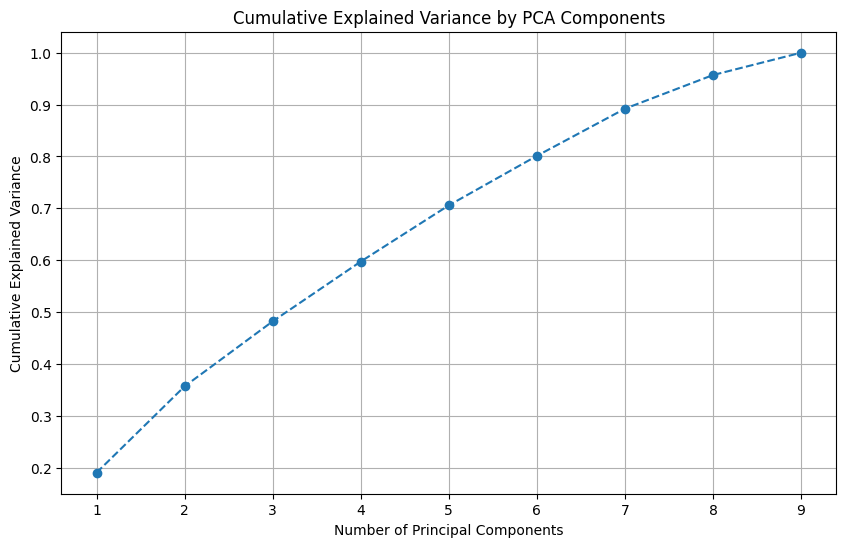

Number of principal components to retain 95% of variance: 8
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.363194 -0.839326 -0.053784 -1.377185  0.173707 -0.541122 -0.214564   
1 -0.376950 -1.074273 -0.179685 -0.542328 -1.540166 -0.625955  0.655418   
2 -0.626029 -0.904753 -0.416555 -1.295663  0.026489 -0.470108  0.022920   
3 -0.934951 -0.269060 -0.373892 -0.477751 -0.138040 -1.054251 -0.637858   
4 -0.311605 -0.858024 -0.315398 -1.620022 -0.028221 -0.072891  0.280714   

        PC8  
0  0.058886  
1 -0.090725  
2  0.467112  
3 -0.351955  
4  0.447165  


In [ ]:
# Initialize PCA
pca = PCA()

# Fit PCA on the standardized data
pca.fit(standardized_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Determine the number of components to retain 95% variance
threshold = 0.95
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1

print(f'Number of principal components to retain 95% of variance: {num_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(standardized_data)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(num_components)])

# Display the first few rows of the principal components dataframe
print(principal_df.head())

# Clustering

Implement K-means for clustering from scratch.

In [ ]:
import numpy as np

def initialize_centroids(data, k):
    """
    Randomly initialize k centroids from the dataset.

    Parameters:
    data (ndarray): The dataset.
    k (int): The number of clusters.

    Returns:
    ndarray: The initialized centroids.
    """
    np.random.seed(42)
    indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[indices]
    return centroids

def assign_clusters(data, centroids):
    """
    Assign each data point to the nearest centroid.

    Parameters:
    data (ndarray): The dataset.
    centroids (ndarray): The centroids.

    Returns:
    ndarray: The cluster assignments.
    """
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, labels, k):
    """
    Update centroids as the mean of all data points assigned to each centroid.

    Parameters:
    data (ndarray): The dataset.
    labels (ndarray): The cluster assignments.
    k (int): The number of clusters.

    Returns:
    ndarray: The updated centroids.
    """
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def k_means(data, k, max_iters=100, tol=1e-4):
    """
    Perform K-means clustering.

    Parameters:
    data (ndarray): The dataset.
    k (int): The number of clusters.
    max_iters (int): The maximum number of iterations.
    tol (float): The tolerance to declare convergence.

    Returns:
    tuple: The cluster assignments and the final centroids.
    """
    centroids = initialize_centroids(data, k)
    for i in range(max_iters):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return labels, centroids


Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

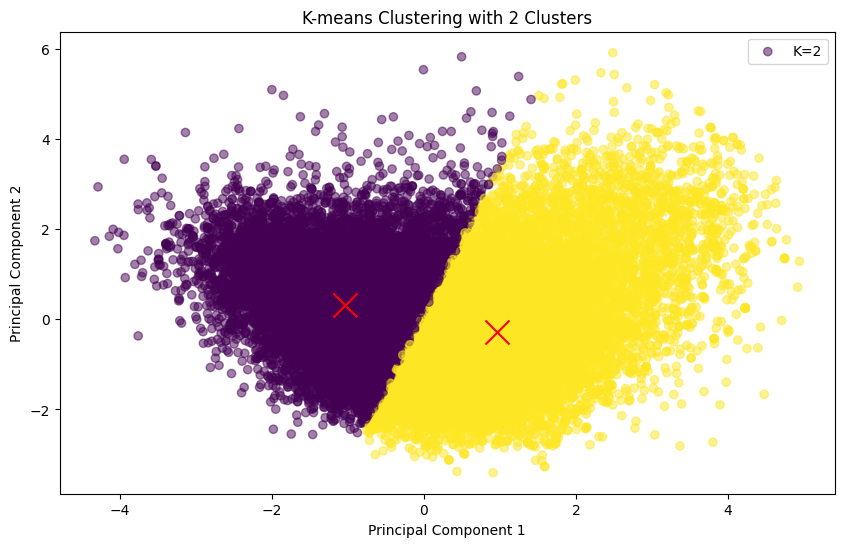

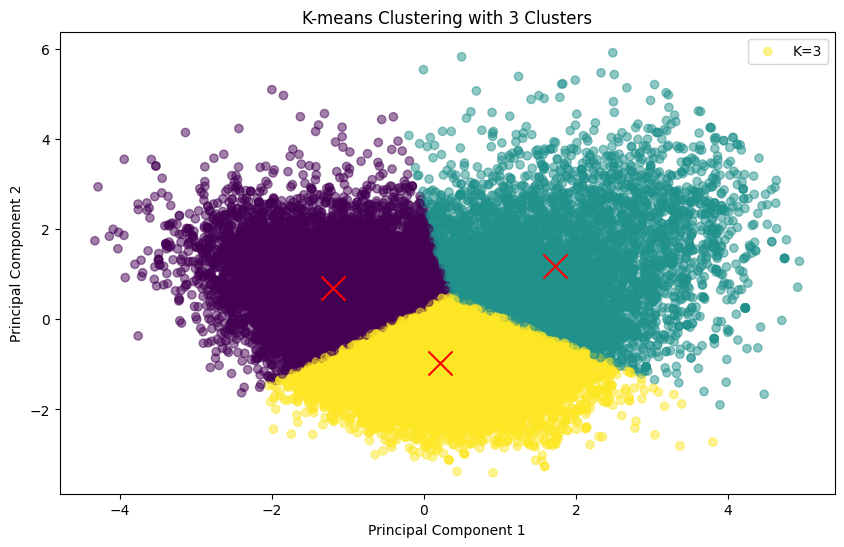

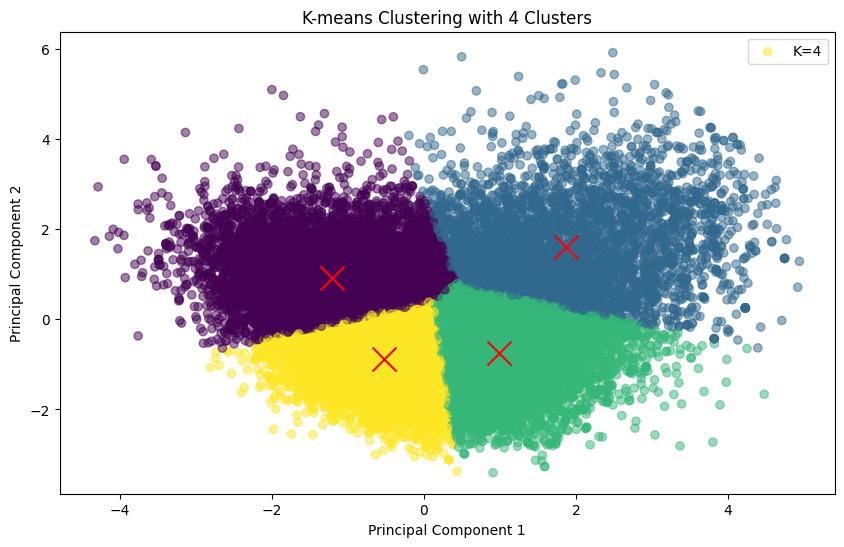

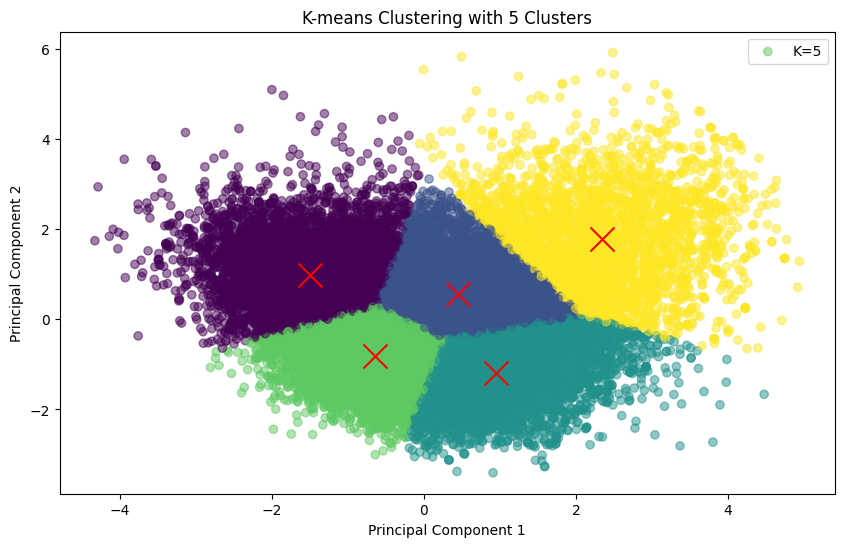

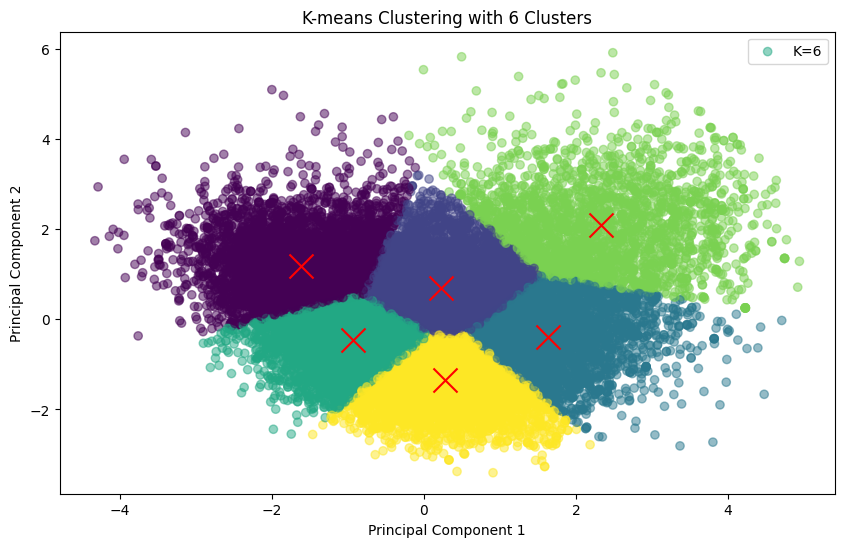

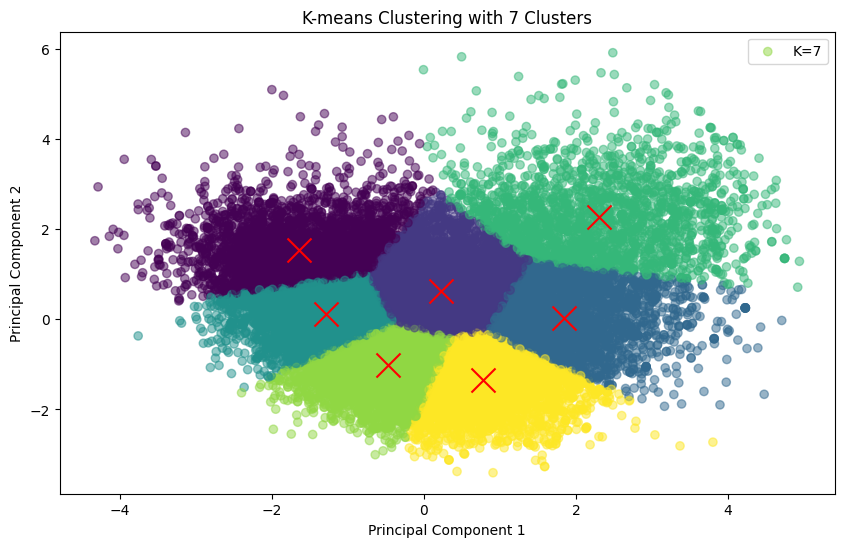

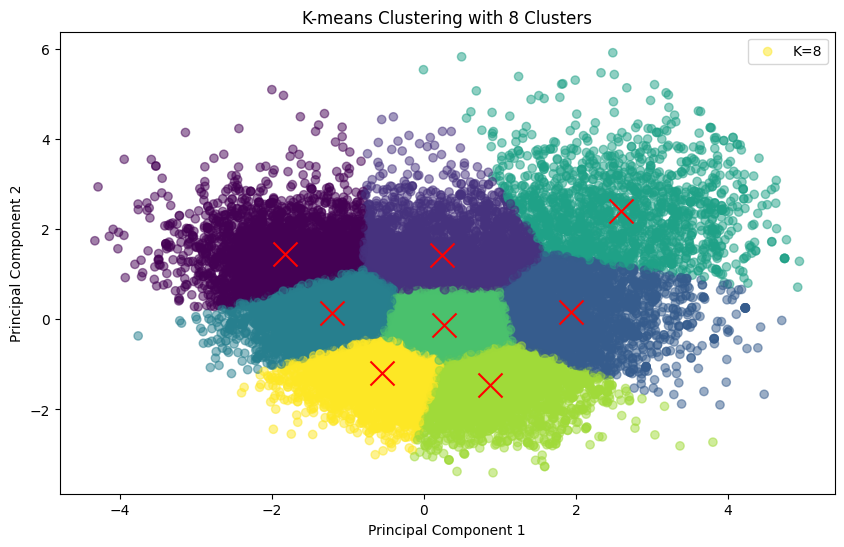

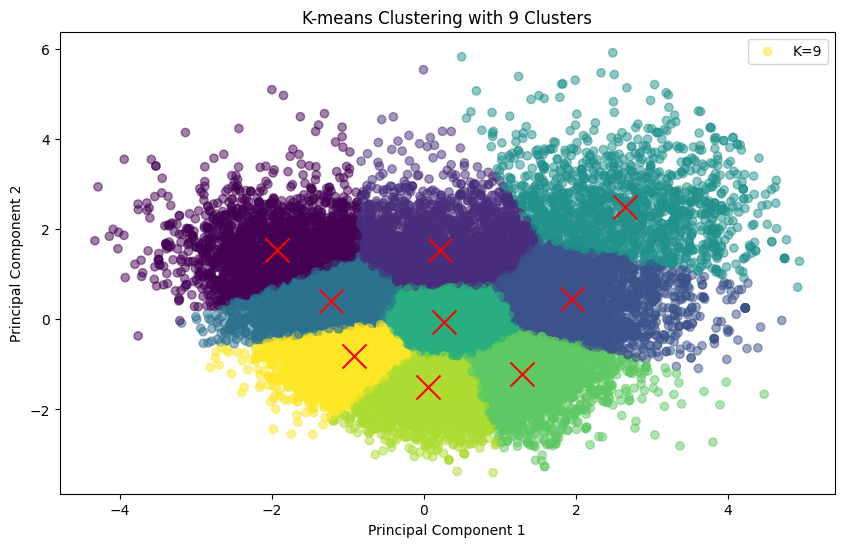

In [ ]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(standardized_data)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
def plot_kmeans_clusters(data, k):
    labels, centroids = k_means(data, k)
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.5, label=f'K={k}')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'K-means Clustering with {k} Clusters')
    plt.legend()
    plt.show()

# Execute K-means for k ranging from 2 to 9 and plot the results
for k in range(2, 10):
    plot_kmeans_clusters(principal_components, k)

The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

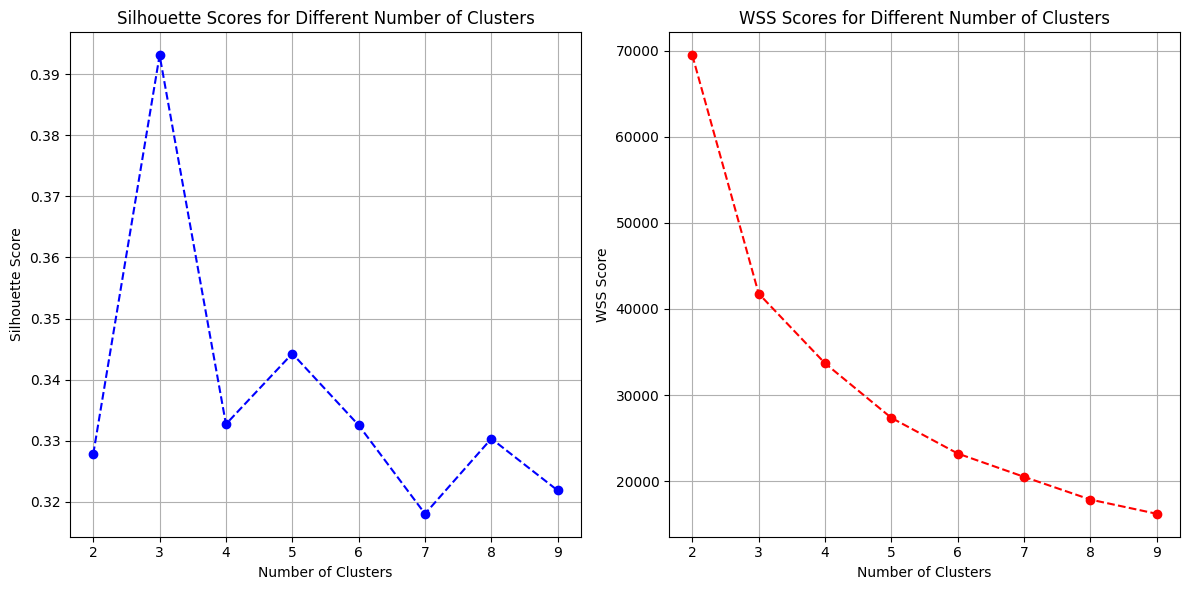

In [ ]:
from sklearn.metrics import silhouette_score

def compute_wss(data, labels, centroids):
    """
    Compute the within-cluster sum of squares (WSS) for the given clustering.

    Parameters:
    data (ndarray): The dataset.
    labels (ndarray): The cluster assignments.
    centroids (ndarray): The centroids of the clusters.

    Returns:
    float: The WSS score.
    """
    wss = 0
    for i in range(len(centroids)):
        cluster_points = data[labels == i]
        wss += np.sum((cluster_points - centroids[i]) ** 2)
    return wss

# Lists to store scores
silhouette_scores = []
wss_scores = []

# Compute scores for k ranging from 2 to 9
for k in range(2, 10):
    labels, centroids = k_means(principal_components, k)
    silhouette_scores.append(silhouette_score(principal_components, labels))
    wss_scores.append(compute_wss(principal_components, labels, centroids))

# Plot Silhouette Scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='--', color='b')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Plot WSS Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), wss_scores, marker='o', linestyle='--', color='r')
plt.title('WSS Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS Score')
plt.grid(True)

plt.tight_layout()
plt.show()


Based on the provided plots:

Silhouette Score Plot: The highest silhouette score is observed at
k=3. A higher silhouette score indicates better-defined clusters. Therefore,
k=3 is a strong candidate.
WSS Score Plot: The WSS plot shows a significant drop at
k=3, after which the rate of decrease slows down. This "elbow point" suggests that adding more clusters beyond
k=3 does not significantly improve the compactness of the clusters.

# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

Cluster 0:
Song 1: SouthSide
Song 2: It's My Life
Distance in original feature space: 1.966579141323533

Cluster 1:
Song 1: Sigo Fresh
Song 2: Break The Sky
Distance in original feature space: 4.660073665020474

Cluster 2:
Song 1: Bad Boy Ken (feat. Siri)
Song 2: O Saki Saki (From "Batla House")
Distance in original feature space: 2.180222115959109



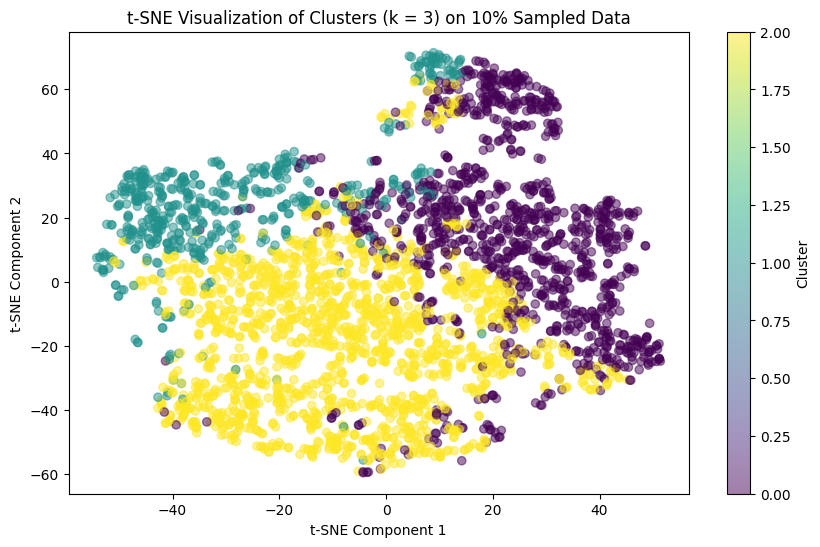

In [ ]:
import random

def select_random_songs_from_clusters(data, labels, n=2):
    clusters = np.unique(labels)
    selected_songs = []

    for cluster in clusters:
        indices = np.where(labels == cluster)[0]
        selected_indices = random.sample(list(indices), n)
        selected_songs.append((selected_indices, cluster))

    return selected_songs

# Sample 10% of the standardized data
sampled_data = standardized_data.sample(frac=0.1, random_state=42)
# Apply PCA to reduce the dimensions to 2 for the sampled data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(sampled_data)
# Run K-means with the optimal number of clusters found (k = 3) on the sampled data
optimal_k = 3
labels, centroids = k_means(principal_components, optimal_k)
# Select two songs from each cluster
selected_songs = select_random_songs_from_clusters(sampled_data, labels)

# Display the selected songs and their distances in the original feature space
for (indices, cluster) in selected_songs:
    song1, song2 = sampled_data.iloc[indices[0]], sampled_data.iloc[indices[1]]
    distance = np.linalg.norm(song1 - song2)
    print(f'Cluster {cluster}:')
    print(f'Song 1: {spotify_data.iloc[sampled_data.index[indices[0]]]["track_name"]}')
    print(f'Song 2: {spotify_data.iloc[sampled_data.index[indices[1]]]["track_name"]}')
    print(f'Distance in original feature space: {distance}\n')
# Apply t-SNE to the sampled data
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(sampled_data)

# Plot the t-SNE results with the cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization of Clusters (k = 3) on 10% Sampled Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()




Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

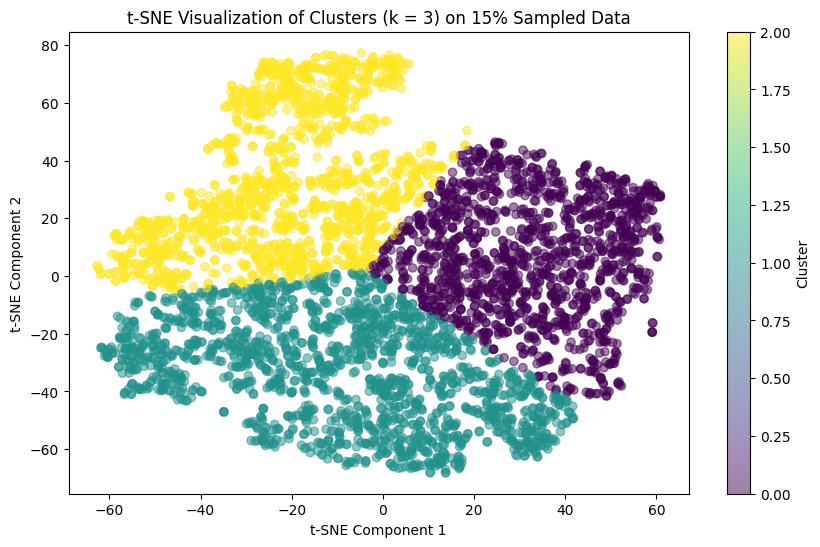

In [ ]:
# Sample 10% of the standardized data
sampled_data = standardized_data.sample(frac=0.15, random_state=42)
# Apply t-SNE to the sampled data
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(sampled_data)
# Run K-means with the optimal number of clusters found (k = 3) on the t-SNE reduced data
optimal_k = 3
labels, centroids = k_means(tsne_components, optimal_k)
# Plot the t-SNE results with the cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization of Clusters (k = 3) on 15% Sampled Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()
